# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [2]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


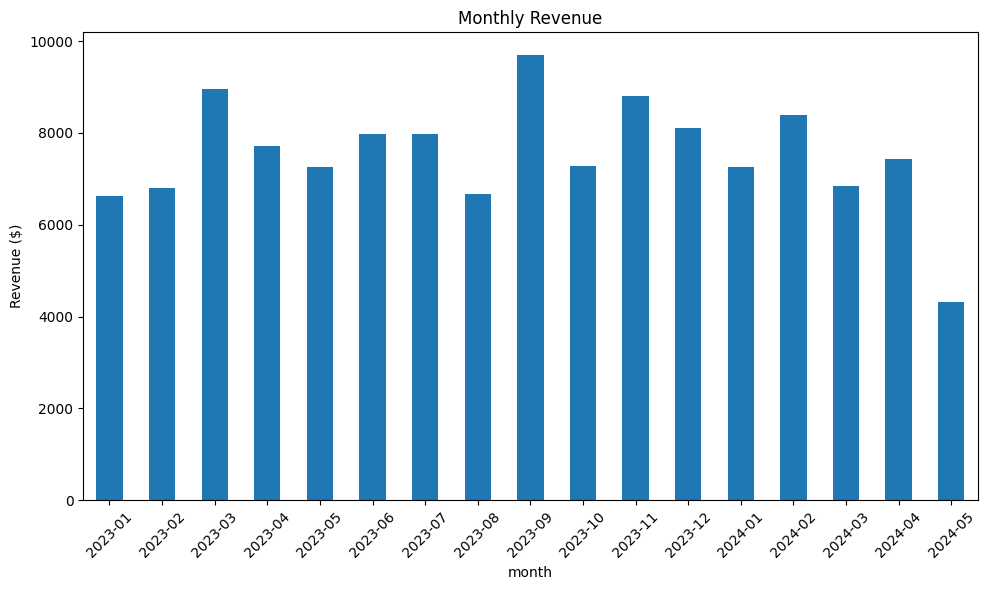

In [3]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Total Revenue Last Quarter:
month
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
Freq: M, Name: revenue, dtype: float64


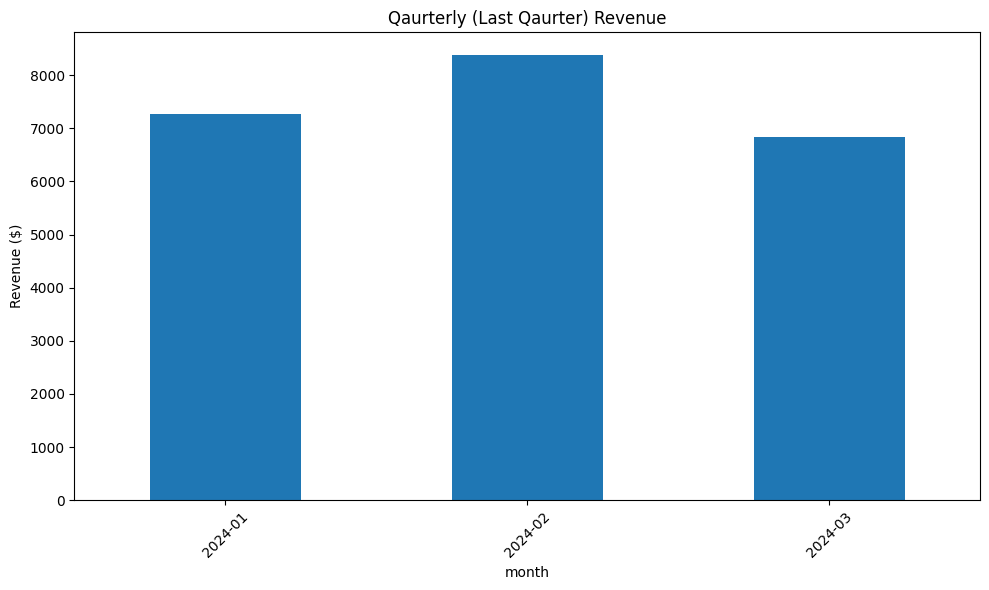

In [4]:
# Your code here
data["order_date"] = pd.to_datetime(data["order_date"])
# Quarters are 3-month periods, last quarter here would be 1-3, 4-7, 8-12
data = data[data["order_date"].dt.year == 2024]
data["month"] = data["order_date"].dt.to_period("M")
data["quarter"] = data["month"].dt.quarter
q1 = data[data['quarter'] == 1]
q2 = data[data['quarter'] == 2]
quarter_revenue = q1.groupby("month")["revenue"].sum()
print("Total Revenue Last Quarter:")
print(quarter_revenue)

# Plot quarterly revenue
quarter_revenue.plot(kind="bar", figsize=(10,6), title="Qaurterly (Last Qaurter) Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

Costumer - Revenue:
customer_segment
Professional    14313.78
Student         12081.18
Senior           7843.27
Name: revenue, dtype: float64


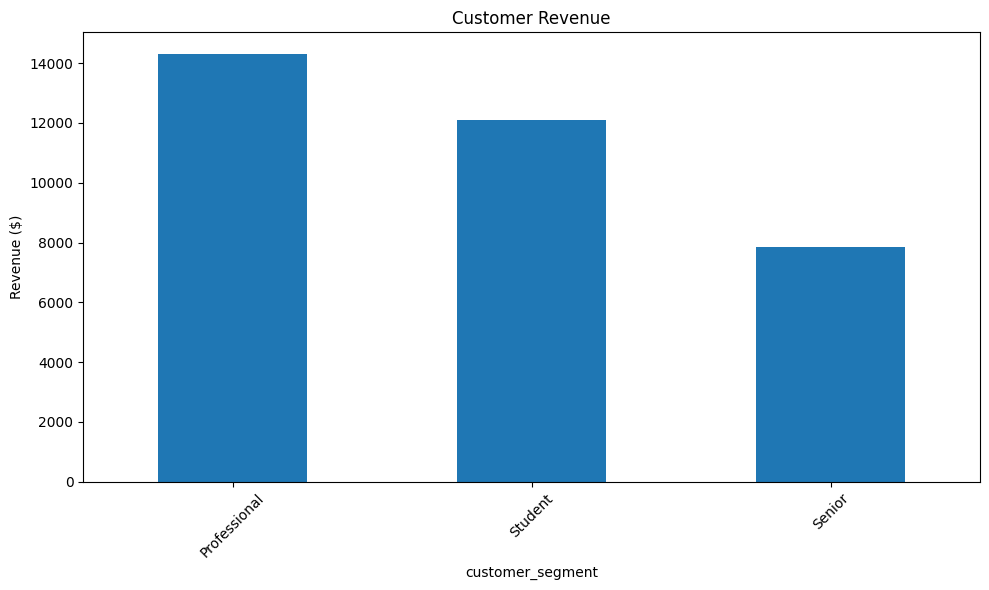

In [82]:
# Your code here
top_customers = data.groupby("customer_segment")["revenue"].sum()
print("Costumer - Revenue:")
print(top_customers.sort_values(ascending=False).head(5))
top_customers = top_customers.sort_values(ascending=False).head(5)
# Plot customer - revenue
top_customers.plot(kind="bar", figsize=(10,6), title="Customer Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

Costumer type - Price:
customer_segment
Professional    270.071321
Senior          261.442333
Student         232.330385
Name: revenue, dtype: float64


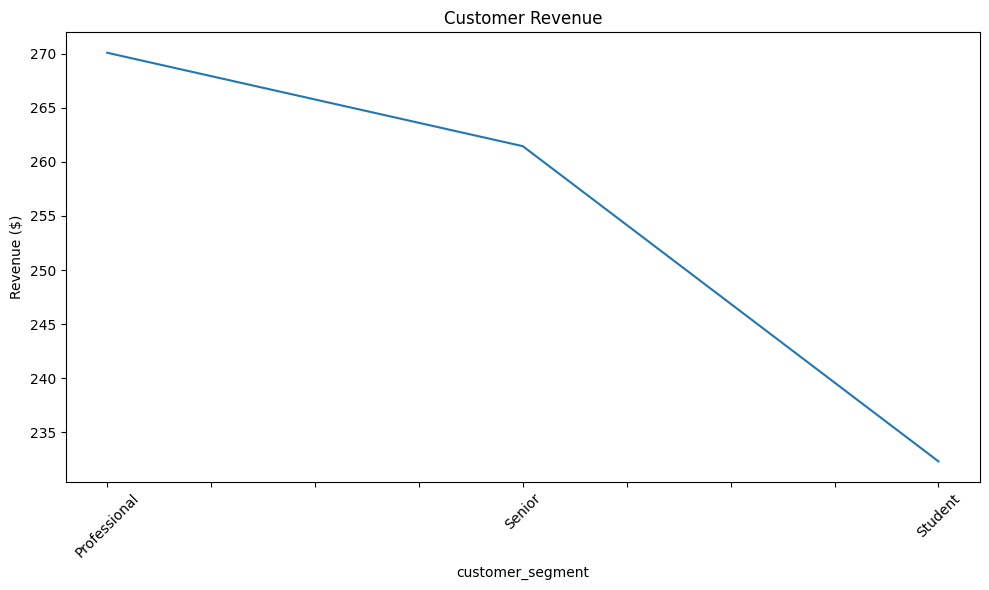

In [6]:
# Your code here
customer_price = data.groupby("customer_segment")["revenue"].mean()
print("Costumer type - Price:")
print(customer_price.sort_values(ascending=False))
# Plot customer - revenue
customer_price.plot(kind="line", figsize=(10,6), title="Customer Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

Region With Highest Revenue:
region
East     7960.67
North    9071.53
South    9191.32
West     8014.71
Name: revenue, dtype: float64


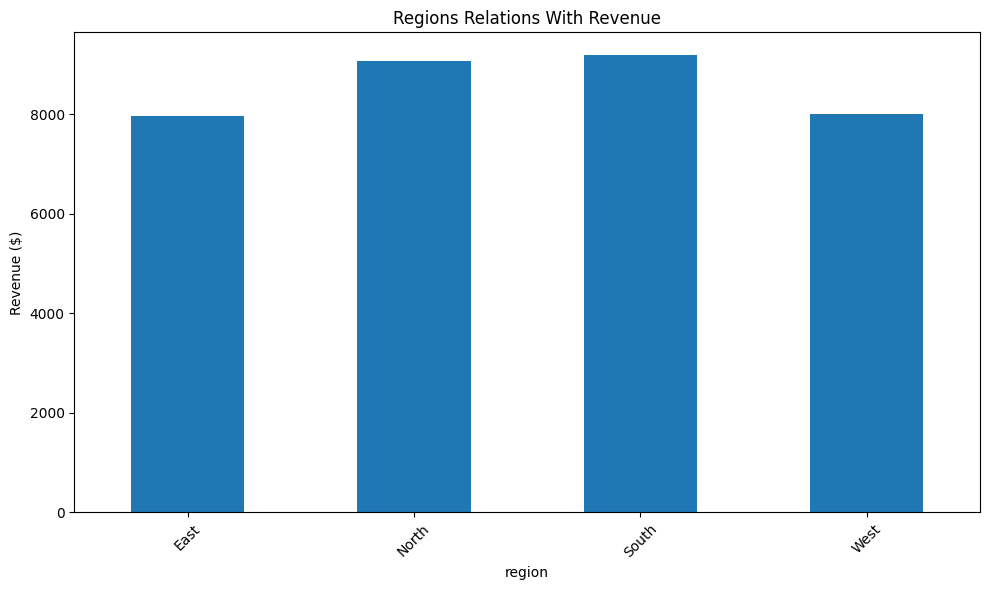

Region With Highest Order Size:
region
East     2.222222
North    2.138889
South    2.657143
West     2.714286
Name: quantity, dtype: float64


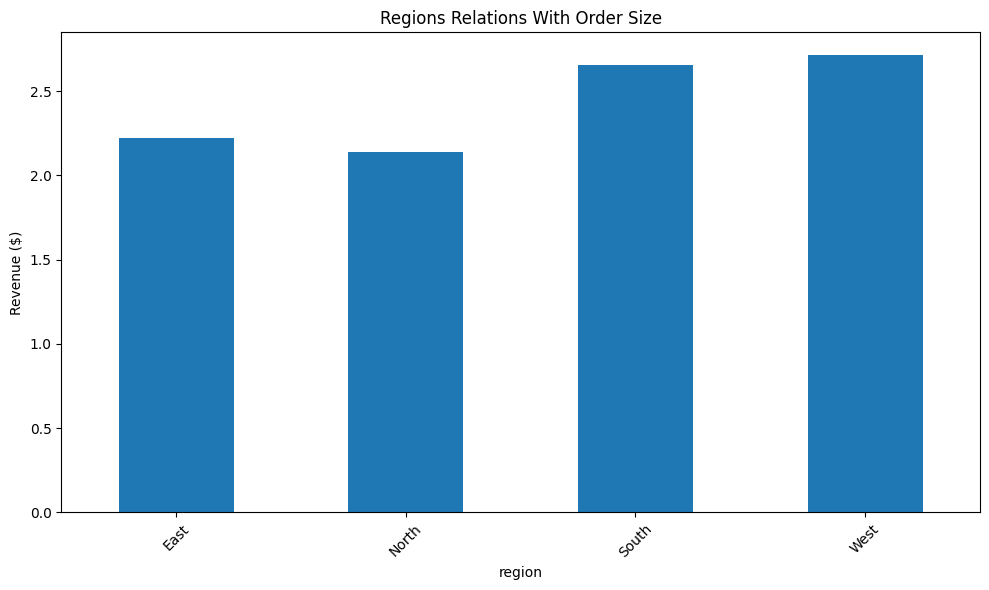

In [7]:
# Your code here
# revenue
regional_trends = data.groupby('region')['revenue'].sum()
print("Region With Highest Revenue:")
print(regional_trends)

# Plot quarterly revenue
regional_trends.plot(kind="bar", figsize=(10,6), title="Regions Relations With Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# order size 
regional_trends2 = data.groupby('region')['quantity'].mean()
print("Region With Highest Order Size:")
print(regional_trends2)
# Plot quarterly revenue
regional_trends2.plot(kind="bar", figsize=(10,6), title="Regions Relations With Order Size")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

In [44]:
data['product_category'].value_counts()

product_category
Electronics    33
Sports         29
Clothing       29
Home           27
Books          17
Name: count, dtype: int64

Popularity By Quantity:
product_category
Books          39
Clothing       62
Electronics    80
Home           72
Sports         73
Name: quantity, dtype: int64
Popularity By Revenue:
product_category
Books          4563.37
Clothing       5285.78
Electronics    7994.90
Home           9167.26
Sports         7226.92
Name: revenue, dtype: float64


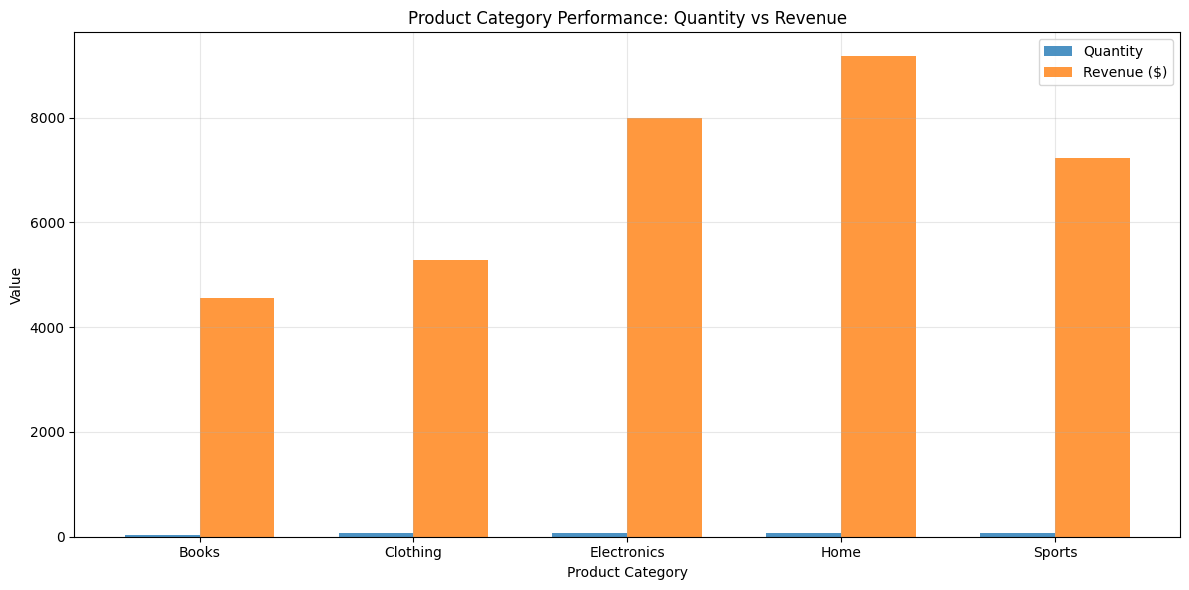

In [46]:
# Your code here
popular_quantity = data.groupby('product_category')['quantity'].sum()
print("Popularity By Quantity:")
print(popular_quantity)
popular_revenue = data.groupby('product_category')['revenue'].sum()
print("Popularity By Revenue:")
print(popular_revenue)

categories = popular_quantity.index
quantity_values = popular_quantity.values
revenue_values = popular_revenue.values

# Set up the plot
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, quantity_values, width, label='Quantity', alpha=0.8)
bars2 = ax.bar(x + width/2, revenue_values, width, label='Revenue ($)', alpha=0.8)

ax.set_xlabel('Product Category')
ax.set_ylabel('Value')
ax.set_title('Product Category Performance: Quantity vs Revenue')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

In [ ]:
# Your code here
discounted = data[data['discount_applied'] > 0]
nondisc = data[data['discount_applied'] == 0]

dis = discounted['revenue'].mean().round(2)
non =  nondisc['revenue'].mean().round(2)
print("Discount Effectiveness:")
print(f"Orders With Disocunts: ${dis}")
print(f"Orders Without Disocunts ${non}")
print(f"The Most Effect Is", ('Non Disocunted Orders' if dis < non else 'Discounted Orders'))

Discount Effectiveness:
Orders With Disocunts: $265.51
Orders Without Disocunts $239.19
The Most Effect Is Discounted Orders


### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

Precent Of Orders Related To Payment Methods:
payment_method
Credit Card    30.37
Gift Card      26.67
Debit Card     21.48
PayPal         21.48
Name: count, dtype: float64


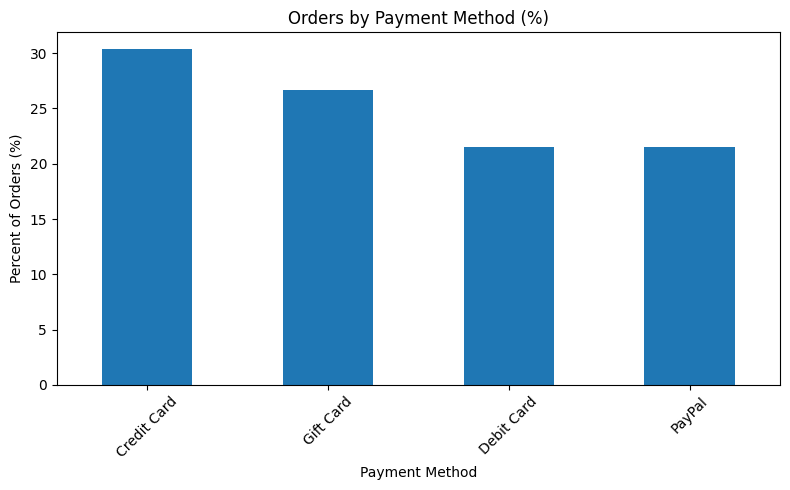

Payment Methods Correlation To Higher Spending:
payment_method
Gift Card      275.807778
Credit Card    260.253415
Debit Card     257.375517
PayPal         212.926552
Name: revenue, dtype: float64


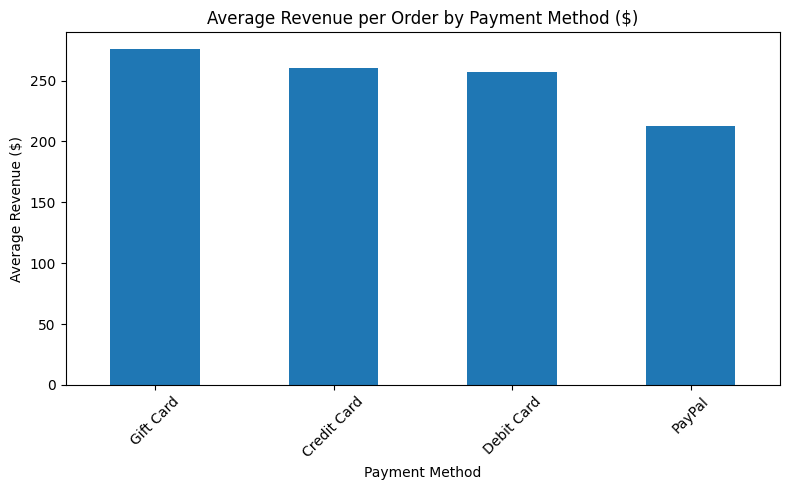

In [ ]:
# Your code here
counts = data['payment_method'].value_counts()
pct = (counts / counts.sum() * 100).round(2)
print("Precent Of Orders Related To Payment Methods:")
print(pct)
plt.figure(figsize=(8,5))
pct.plot(kind="bar", title="Orders by Payment Method (%)")
plt.ylabel("Percent of Orders (%)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average revenue per order by payment method
mean_rev = data.groupby('payment_method')['revenue'].mean().sort_values(ascending=False)
print("Payment Methods Correlation To Higher Spending:")
print(mean_rev)
plt.figure(figsize=(8,5))
mean_rev.plot(kind="bar", title="Average Revenue per Order by Payment Method ($)")
plt.ylabel("Average Revenue ($)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

Weekly Revenue:
day_of_week
Sunday       2935.22
Monday       4421.92
Tuesday      5078.99
Wednesday    6195.40
Thursday     5568.30
Friday       5160.91
Saturday     4877.49
Name: revenue, dtype: float64


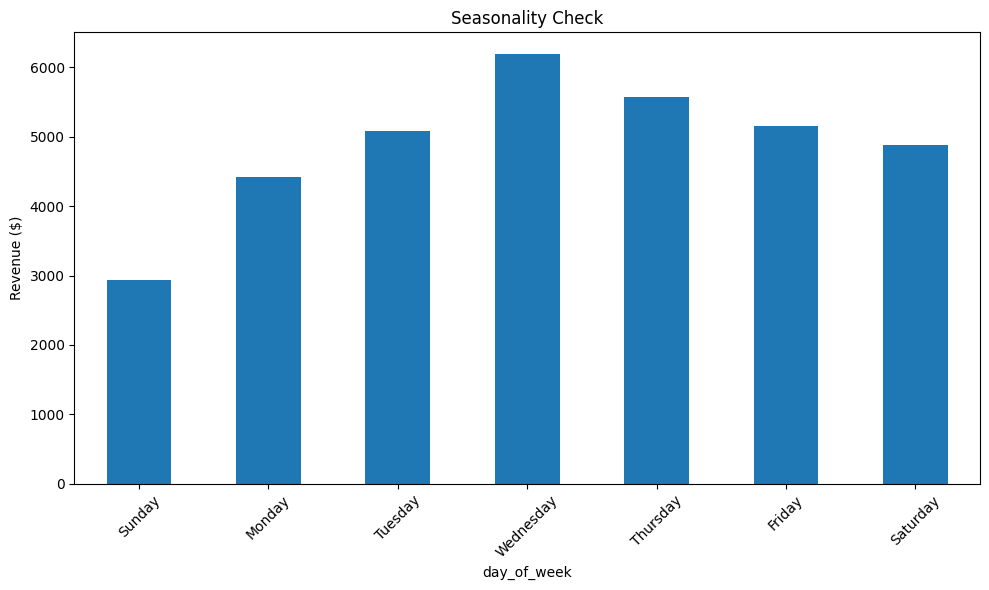

In [42]:
# Your code here
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekly_rev = data.groupby('day_of_week')['revenue'].sum().reindex(day_order)
print('Weekly Revenue:')
print(weekly_rev)

weekly_rev.plot(kind="bar", figsize=(10,6), title="Seasonality Check")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Most Profitiable Region:
South
Profit In South:
1838.2640000000001


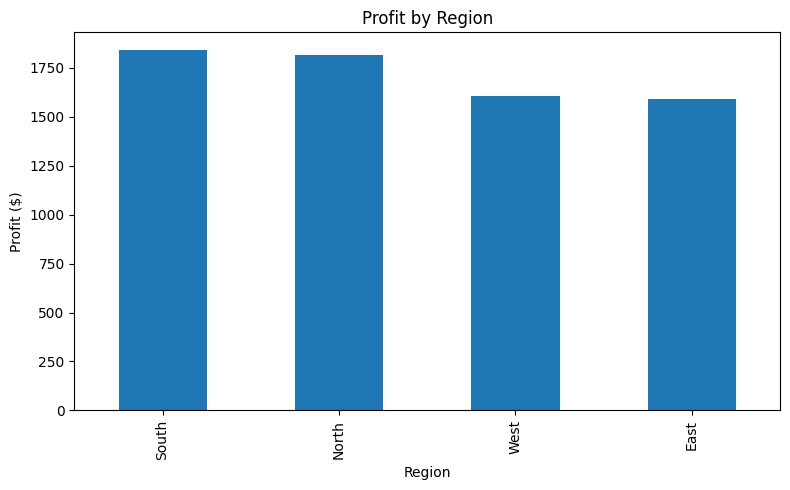

In [ ]:
# Your code here
data['profit'] = data['revenue'] * 0.20

total_profit = data['profit'].sum()

# Profit by region and top region
profit_by_region = data.groupby('region')['profit'].sum().sort_values(ascending=False)
top_region = profit_by_region.idxmax()
top_region_profit = profit_by_region.max()

print("Most Profitiable Region:")
print(top_region)
print(f"Profit In {top_region}:")
print(top_region_profit)

# Plot findings
profit_by_region.plot(kind='bar', title='Profit by Region', ylabel='Profit ($)', xlabel='Region', figsize=(8,5))
plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

Write your analysis and recommendation based on the insights you discovered from the data.

Most sales by region come from the South, people are more likely to shop on Wednesdays, and Professionals are your highest spenders. I would recommend to make sure you have high stock on Home goods, Electroncs, and Sports. With your highest paying audience being Professionals, they would likely need these products more. Continue doing discounted orders, they accumulate greater value. Do more promotions of your gift cards and focus on the South region.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.